In [1]:
import sys
sys.path.append('..')

from pathlib import Path
import joblib
import shap
shap.initjs()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("kaizar")

from src.data.preprocess import load_raw, split_features_target
from src.data.feature_engineering import apply_feature_engineering


In [2]:
df, DATA_DIR = load_raw()
df = apply_feature_engineering(df)
X, y, _ = split_features_target(df)


In [3]:
MODELS_DIR = DATA_DIR.parent / "models"
MODELS_DIR.mkdir(parents=True, exist_ok=True)
clf = joblib.load(MODELS_DIR / "model.pkl")

In [4]:
preprocessor = clf.named_steps["preprocessor"]
model = clf.named_steps["model"]

X_processed = preprocessor.transform(X)
feature_names = (
    preprocessor.get_feature_names_out()
    if hasattr(preprocessor, "get_feature_names_out")
    else None
)


In [5]:
nice_labels = [
    "Senior citizen",                         # num__SeniorCitizen
    "Tenure (months)",                        # num__tenure
    "Monthly charges",                        # num__MonthlyCharges
    "Total charges to date",                  # num__TotalCharges
    "Average monthly spend",                  # num__avg_monthly_total
    "Month-to-month indicator",               # num__is_month_to_month
    "Fiber connection present",               # num__has_fiber
    "Multi-service flag",                     # num__multi_service

    "Gender: Female",                         # cat__gender_Female
    "Gender: Male",                           # cat__gender_Male

    "No partner",                              # cat__Partner_No
    "Has partner",                             # cat__Partner_Yes

    "No dependents",                           # cat__Dependents_No
    "Has dependents",                          # cat__Dependents_Yes

    "No phone service",                        # cat__PhoneService_No
    "Phone service",                           # cat__PhoneService_Yes

    "No multiple lines",                       # cat__MultipleLines_No
    "No multiple lines (no phone service)",    # cat__MultipleLines_No phone service
    "Multiple lines",                          # cat__MultipleLines_Yes

    "DSL internet",                            # cat__InternetService_DSL
    "Fiber-optic internet",                    # cat__InternetService_Fiber optic
    "No internet service",                     # cat__InternetService_No

    "No online security",                      # cat__OnlineSecurity_No
    "No online security (no internet)",        # cat__OnlineSecurity_No internet service
    "Online security",                         # cat__OnlineSecurity_Yes

    "No online backup",                        # cat__OnlineBackup_No
    "No online backup (no internet)",          # cat__OnlineBackup_No internet service
    "Online backup",                           # cat__OnlineBackup_Yes

    "No device protection",                    # cat__DeviceProtection_No
    "No device protection (no internet)",      # cat__DeviceProtection_No internet service
    "Device protection",                       # cat__DeviceProtection_Yes

    "No tech support",                         # cat__TechSupport_No
    "No tech support (no internet)",           # cat__TechSupport_No internet service
    "Tech support",                            # cat__TechSupport_Yes

    "No streaming TV",                         # cat__StreamingTV_No
    "No streaming TV (no internet)",           # cat__StreamingTV_No internet service
    "Streaming TV",                            # cat__StreamingTV_Yes

    "No streaming movies",                     # cat__StreamingMovies_No
    "No streaming movies (no internet)",       # cat__StreamingMovies_No internet service
    "Streaming movies",                        # cat__StreamingMovies_Yes

    "Contract: Month-to-month",                # cat__Contract_Month-to-month
    "Contract: One-year",                      # cat__Contract_One year
    "Contract: Two-year",                      # cat__Contract_Two year

    "Paperless billing: No",                   # cat__PaperlessBilling_No
    "Paperless billing: Yes",                  # cat__PaperlessBilling_Yes

    "Payment: Bank transfer (auto)",           # cat__PaymentMethod_Bank transfer (automatic)
    "Payment: Credit card (auto)",             # cat__PaymentMethod_Credit card (automatic)
    "Payment: Electronic check",               # cat__PaymentMethod_Electronic check
    "Payment: Mailed check",                   # cat__PaymentMethod_Mailed check

    "Tenure bucket: 0–12 months",              # cat__tenure_bucket_0-12
    "Tenure bucket: 13–24 months",             # cat__tenure_bucket_13-24
    "Tenure bucket: 25–48 months",             # cat__tenure_bucket_25-48
    "Tenure bucket: 49–72 months"              # cat__tenure_bucket_49-72
]


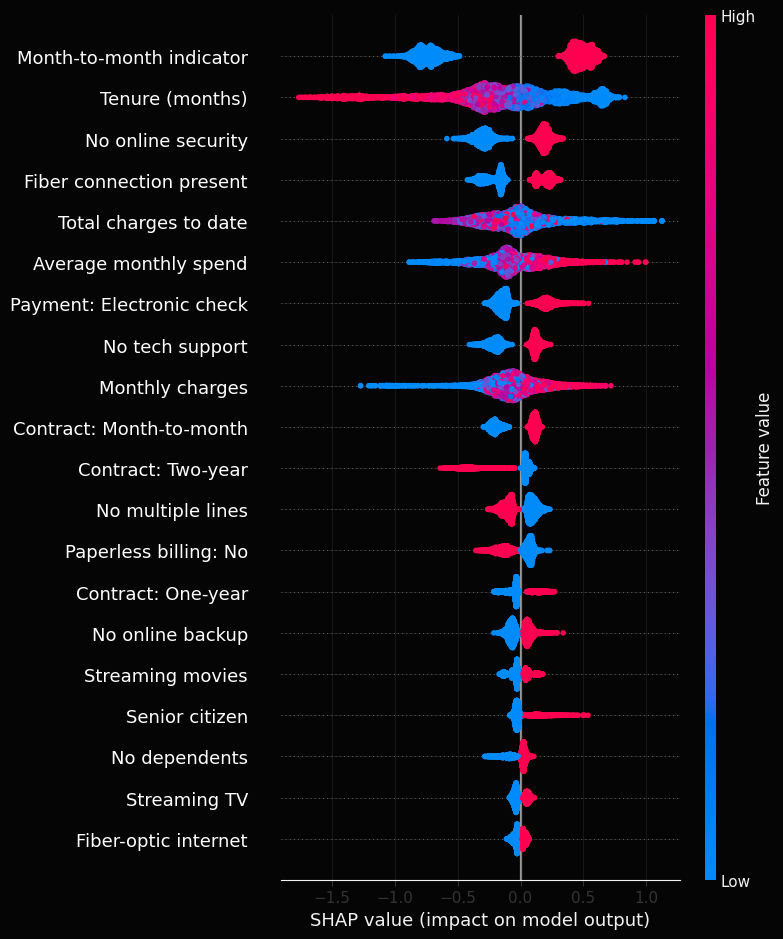

In [6]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_processed)
shap.summary_plot(shap_values, X_processed, feature_names=nice_labels, show=False)
ax = plt.gca()
for label in ax.get_yticklabels():
    label.set_color("white")

plt.show()

In [7]:
import numpy as np

mean_abs = np.abs(shap_values.values).mean(axis=0)
top10_idx = np.argsort(-mean_abs)[:10]

top_drivers = pd.DataFrame({
    "feature": feature_names[top10_idx],
    "mean_abs_shap": mean_abs[top10_idx]
})
top_drivers


,feature,mean_abs_shap
0,num__is_month_to_month,0.599984
1,num__tenure,0.363829
2,cat__OnlineSecurity_No,0.244195
3,num__has_fiber,0.208803
4,num__TotalCharges,0.202446
5,num__avg_monthly_total,0.191741
6,cat__PaymentMethod_Electronic check,0.171199
7,cat__TechSupport_No,0.165561
8,num__MonthlyCharges,0.162359
9,cat__Contract_Month-to-month,0.150912


In [8]:
shap.initjs()

In [10]:
idx = 0

shap.force_plot(shap_values[idx])
